In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog, minimize, differential_evolution

# Visual representations

## Linear problem

$$
\begin{align}
    \text{maximize}~ \;\; & 5 x_{1} + 4 x_{2} \\
    \text{subject to}~ \;\; & 2 x_{1} + 3 x_{2} \leq 12 \\
    & 2 x_{1} + x_{2} \leq 6 \\
    & x_{i} \geq 0 & \forall \; i \in \{  1, 2 \} \\
    & x_{i} \in \mathbb{Z} & \forall \; i \in \{  1, 2 \}
\end{align}
$$

In [2]:
c = np.array([-5.0, -4.0])

A_ub = np.array(
    [[2.0, 3.0],
     [2.0, 1.0]]
)
b_ub = np.array([12.0, 6.0])

sol_relaxed = linprog(c, A_ub=A_ub, b_ub=b_ub)

print("Relaxed Solution:")
print(sol_relaxed.x)
print(sol_relaxed.fun)

sol_int = linprog(c, A_ub=A_ub, b_ub=b_ub, integrality=np.ones(2))
print("\nInteger Solution:")
print(sol_int.x)
print(sol_int.fun)

Relaxed Solution:
[1.5 3. ]
-19.5

Integer Solution:
[2. 2.]
-18.0


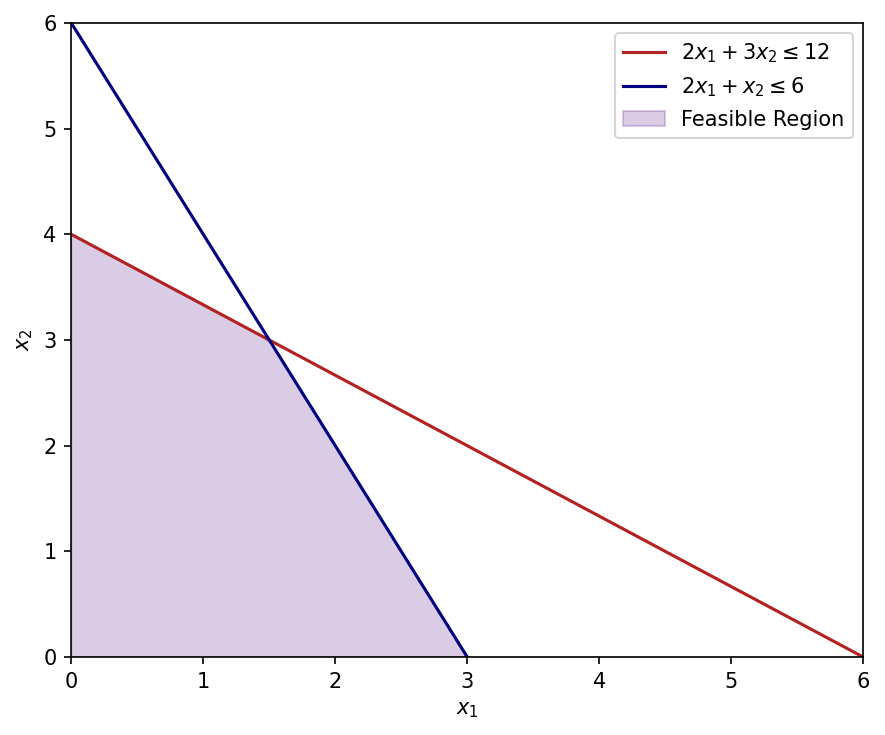

In [35]:
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)

y_a1 = (b_ub[0] -  A_ub[0, 0] * x) / A_ub[0, 1]
y_a2 = (b_ub[1] -  A_ub[1, 0] * x) / A_ub[1, 1]

y_active = np.minimum(y_a1, y_a2)

fig, ax = plt.subplots(figsize=(6, 5), dpi=150)

ax.plot(x, y_a1, color="firebrick", label="$2 x_{1} + 3 x_{2} \leq 12$")
ax.plot(x, y_a2, color="navy", label="$2 x_{1} + x_{2} \leq 6$")

ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.fill_between(x, 0, y_active, color="indigo", alpha=0.2, label="Feasible Region")

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

ax.legend()
fig.tight_layout()

plt.show()

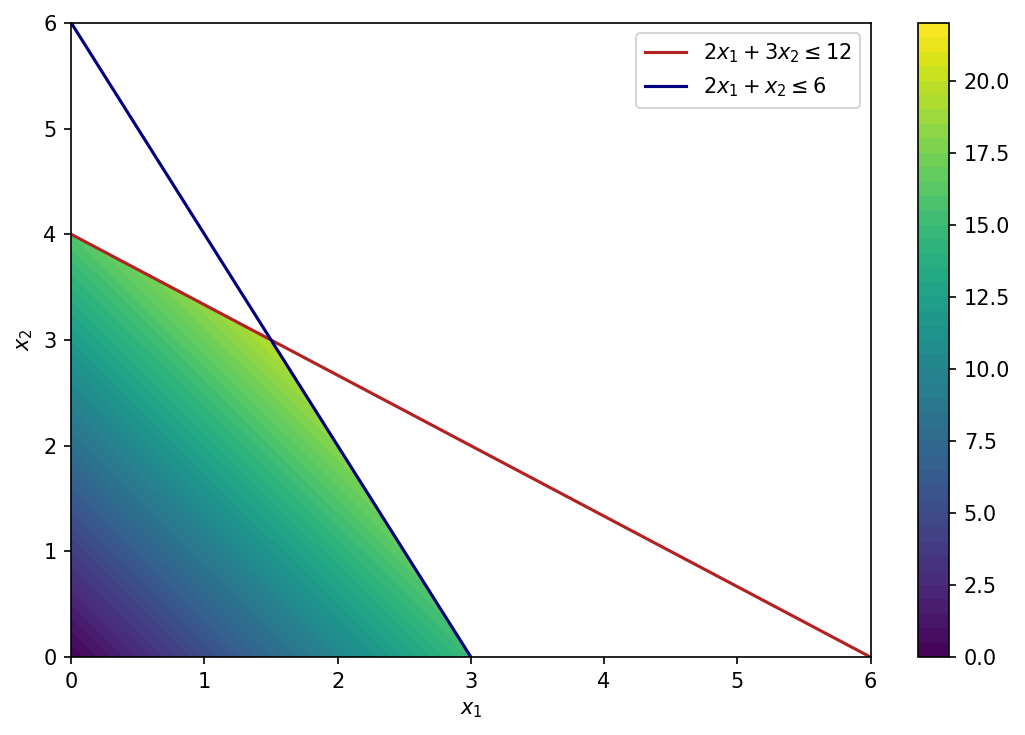

In [36]:
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)

x_mesh, y_mesh = np.meshgrid(x, y)

z = -c[0] * x_mesh - c[1] * y_mesh

epsilon = 1.0
a1_plus = A_ub[0, 0] * x_mesh + A_ub[0, 1] * y_mesh <= b_ub[0] + epsilon
a2_plus = A_ub[1, 0] * x_mesh + A_ub[1, 1] * y_mesh <= b_ub[1] + epsilon

z[~ (a1_plus & a2_plus)] = np.nan

y_a1 = (b_ub[0] -  A_ub[0, 0] * x) / A_ub[0, 1]
y_a2 = (b_ub[1] -  A_ub[1, 0] * x) / A_ub[1, 1]

y_active = np.minimum(y_a1, y_a2)

fig, ax = plt.subplots(figsize=(7, 5), dpi=150)

map = ax.contourf(x_mesh, y_mesh, z, levels=50)
ax.fill_between(x, y_active, 6, color="white", alpha=1.0)

ax.plot(x, y_a1, color="firebrick", label="$2 x_{1} + 3 x_{2} \leq 12$")
ax.plot(x, y_a2, color="navy", label="$2 x_{1} + x_{2} \leq 6$")

ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

ax.legend()
plt.colorbar(map, ax=ax, label=None, fraction=0.1)

fig.tight_layout()

plt.show()

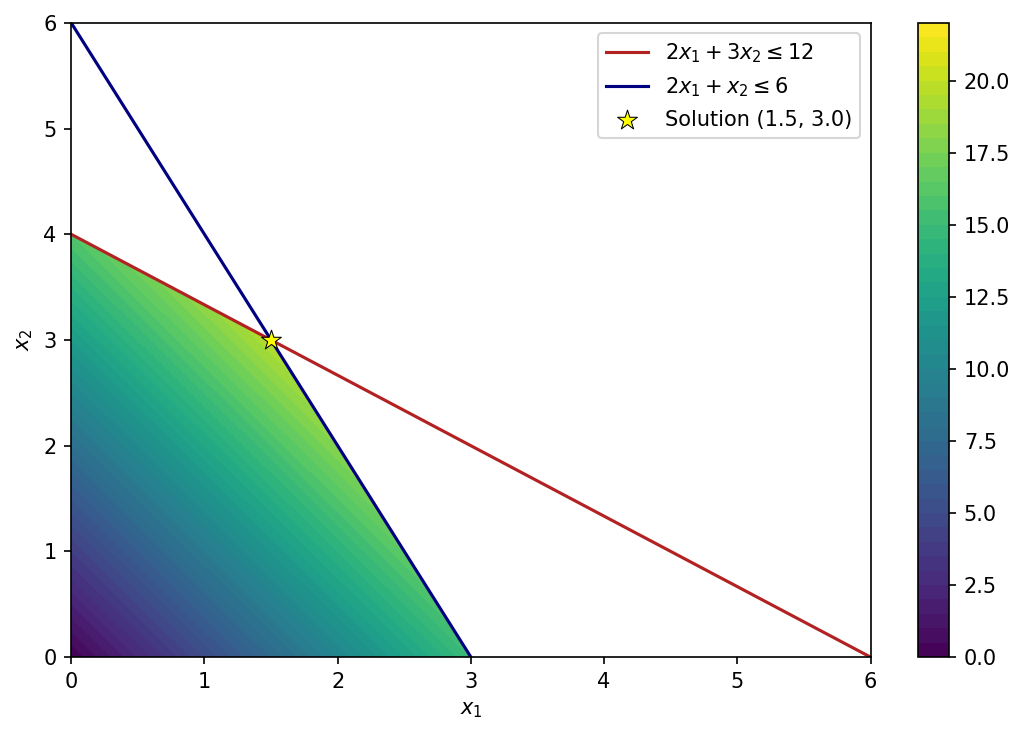

In [37]:
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)

x_mesh, y_mesh = np.meshgrid(x, y)

z = -c[0] * x_mesh - c[1] * y_mesh

epsilon = 1.0
a1_plus = A_ub[0, 0] * x_mesh + A_ub[0, 1] * y_mesh <= b_ub[0] + epsilon
a2_plus = A_ub[1, 0] * x_mesh + A_ub[1, 1] * y_mesh <= b_ub[1] + epsilon

z[~ (a1_plus & a2_plus)] = np.nan

y_a1 = (b_ub[0] -  A_ub[0, 0] * x) / A_ub[0, 1]
y_a2 = (b_ub[1] -  A_ub[1, 0] * x) / A_ub[1, 1]

y_active = np.minimum(y_a1, y_a2)

fig, ax = plt.subplots(figsize=(7, 5), dpi=150)

map = ax.contourf(x_mesh, y_mesh, z, levels=50)
ax.fill_between(x, y_active, 6, color="white", alpha=1.0)

ax.plot(x, y_a1, color="firebrick", label="$2 x_{1} + 3 x_{2} \leq 12$")
ax.plot(x, y_a2, color="navy", label="$2 x_{1} + x_{2} \leq 6$")

ax.scatter([sol_relaxed.x[0]], [sol_relaxed.x[1]], color="yellow", edgecolors="black",
           linewidths=0.5, marker="*", s=100.0,
           label=f"Solution ({sol_relaxed.x[0]:.1f}, {sol_relaxed.x[1]:.1f})",
           zorder=10)

ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

ax.legend()
plt.colorbar(map, ax=ax, label=None, fraction=0.1)

fig.tight_layout()

plt.show()

In [38]:
# P1
A_ub_p1 = np.vstack((A_ub, np.atleast_2d([1.0, 0.0])))
b_ub_p1 = np.append(b_ub, np.floor(sol_relaxed.x[0]))

sol_p1 = linprog(c, A_ub=A_ub_p1, b_ub=b_ub_p1)
print(f"P1")
print(sol_p1.x)
print(sol_p1.fun)

# P2
A_ub_p2 = np.vstack((A_ub, np.atleast_2d([-1.0, 0.0])))
b_ub_p2 = np.append(b_ub, -np.ceil(sol_relaxed.x[0]))

sol_p2 = linprog(c, A_ub=A_ub_p2, b_ub=b_ub_p2)
print(f"\nP2")
print(sol_p2.x)
print(sol_p2.fun)

P1
[1.         3.33333333]
-18.333333333333336

P2
[2. 2.]
-18.0


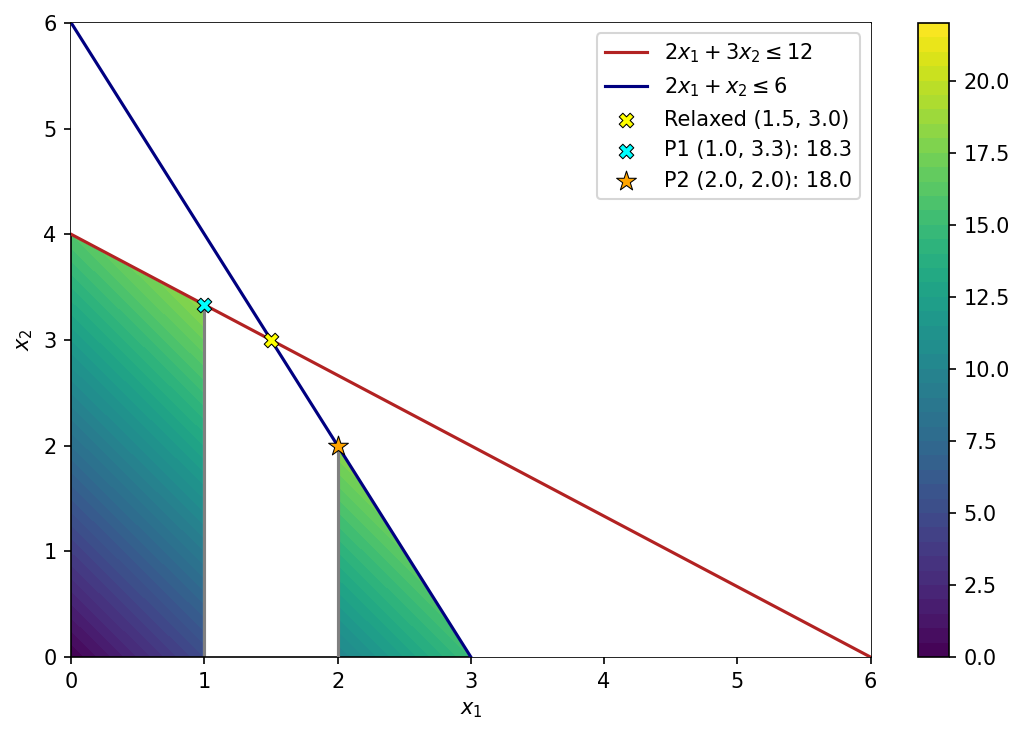

In [39]:
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)

x_mesh, y_mesh = np.meshgrid(x, y)

z = -c[0] * x_mesh - c[1] * y_mesh

epsilon = 1.0
a1_plus = A_ub[0, 0] * x_mesh + A_ub[0, 1] * y_mesh <= b_ub[0] + epsilon
a2_plus = A_ub[1, 0] * x_mesh + A_ub[1, 1] * y_mesh <= b_ub[1] + epsilon

z[~ (a1_plus & a2_plus)] = np.nan

y_a1 = (b_ub[0] -  A_ub[0, 0] * x) / A_ub[0, 1]
y_a2 = (b_ub[1] -  A_ub[1, 0] * x) / A_ub[1, 1]

y_active = np.minimum(y_a1, y_a2)

fig, ax = plt.subplots(figsize=(7, 5), dpi=150)

map = ax.contourf(x_mesh, y_mesh, z, levels=50)
ax.fill_between([np.floor(sol_relaxed.x[0]), np.ceil(sol_relaxed.x[0])], 0, 6, color="white", alpha=1.0, zorder=1)

ax.axvline(np.floor(sol_relaxed.x[0]), color="grey", zorder=2)
ax.axvline(np.ceil(sol_relaxed.x[0]), color="grey", zorder=3)

ax.fill_between(x, y_active, 6, color="white", alpha=1.0, zorder=4)

ax.plot(x, y_a1, color="firebrick", label="$2 x_{1} + 3 x_{2} \leq 12$", zorder=5)
ax.plot(x, y_a2, color="navy", label="$2 x_{1} + x_{2} \leq 6$", zorder=6)

ax.scatter([sol_relaxed.x[0]], [sol_relaxed.x[1]], color="yellow", edgecolors="black",
           linewidths=0.5, marker="X", s=49.0,
           label=f"Relaxed ({sol_relaxed.x[0]:.1f}, {sol_relaxed.x[1]:.1f})",
           zorder=10)

ax.scatter([sol_p1.x[0]], [sol_p1.x[1]], color="cyan", edgecolors="black",
           linewidths=0.5, marker="X", s=49.0,
           label=f"P1 ({sol_p1.x[0]:.1f}, {sol_p1.x[1]:.1f}): {-sol_p1.fun:.1f}",
           zorder=10)

ax.scatter([sol_p2.x[0]], [sol_p2.x[1]], color="orange", edgecolors="black",
           linewidths=0.5, marker="*", s=100.0,
           label=f"P2 ({sol_p2.x[0]:.1f}, {sol_p2.x[1]:.1f}): {-sol_p2.fun:.1f}",
           zorder=10)

ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

ax.legend()
plt.colorbar(map, ax=ax, label=None, fraction=0.1)

fig.tight_layout()

plt.show()

In [40]:
# P3
A_ub_p3 = np.vstack((A_ub_p1, np.atleast_2d([0.0, 1.0])))
b_ub_p3 = np.append(b_ub_p1, np.floor(sol_p1.x[1]))

sol_p3 = linprog(c, A_ub=A_ub_p3, b_ub=b_ub_p3)
print(f"P3")
print(sol_p3.x)
print(sol_p3.fun)

# P4
A_ub_p4 = np.vstack((A_ub_p1, np.atleast_2d([0.0, -1.0])))
b_ub_p4 = np.append(b_ub_p1, -np.ceil(sol_p1.x[1]))

sol_p4 = linprog(c, A_ub=A_ub_p4, b_ub=b_ub_p4)
print(f"P4")
print(sol_p4.x)
print(sol_p4.fun)

P3
[1. 3.]
-17.0
P4
[-0.  4.]
-16.0


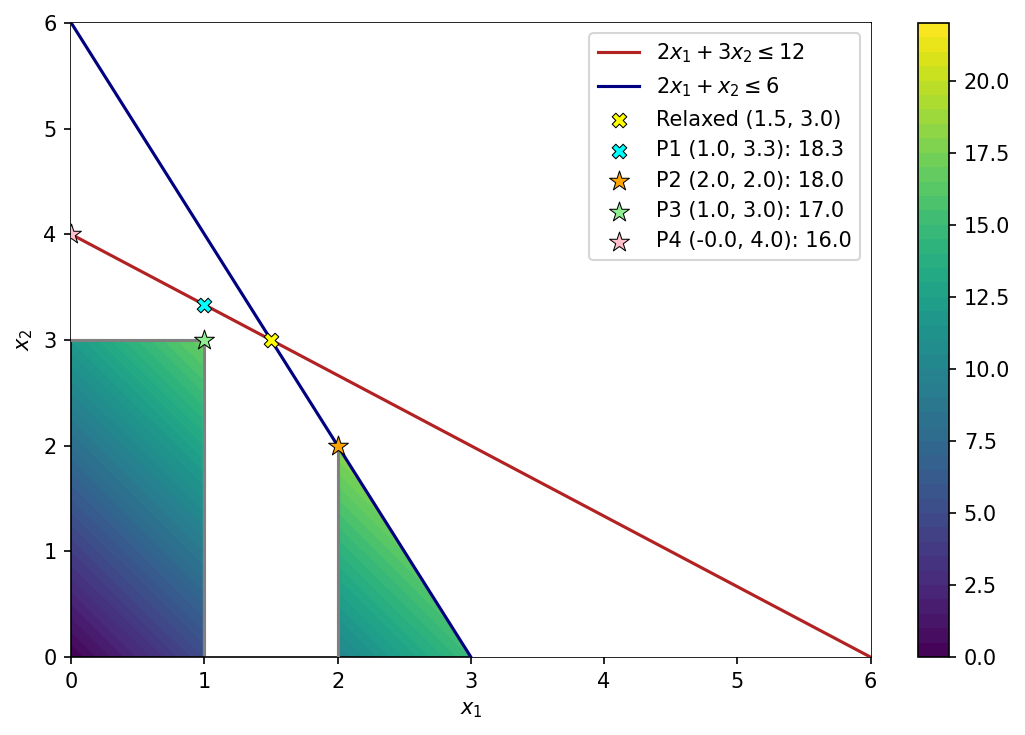

In [41]:
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)

x_mesh, y_mesh = np.meshgrid(x, y)

z = -c[0] * x_mesh - c[1] * y_mesh

epsilon = 1.0
a1_plus = A_ub[0, 0] * x_mesh + A_ub[0, 1] * y_mesh <= b_ub[0] + epsilon
a2_plus = A_ub[1, 0] * x_mesh + A_ub[1, 1] * y_mesh <= b_ub[1] + epsilon

z[~ (a1_plus & a2_plus)] = np.nan

y_a1 = (b_ub[0] -  A_ub[0, 0] * x) / A_ub[0, 1]
y_a2 = (b_ub[1] -  A_ub[1, 0] * x) / A_ub[1, 1]

y_active = np.minimum(y_a1, y_a2)

fig, ax = plt.subplots(figsize=(7, 5), dpi=150)

map = ax.contourf(x_mesh, y_mesh, z, levels=50)
ax.fill_between([np.floor(sol_relaxed.x[0]), np.ceil(sol_relaxed.x[0])], 0, 6, color="white", alpha=1.0, zorder=1)

ax.axvline(np.floor(sol_relaxed.x[0]), color="grey", zorder=2)
ax.axvline(np.ceil(sol_relaxed.x[0]), color="grey", zorder=3)

ax.fill_between([0, 5], np.floor(sol_p1.x[1]), np.ceil(sol_p1.x[1]), color="white", alpha=1.0, zorder=4)
ax.plot([0, np.floor(sol_relaxed.x[0])], [np.floor(sol_p1.x[1]), np.floor(sol_p1.x[1])], color="grey", zorder=5)

ax.fill_between(x, y_active, 6, color="white", alpha=1.0, zorder=4)

ax.plot(x, y_a1, color="firebrick", label="$2 x_{1} + 3 x_{2} \leq 12$", zorder=6)
ax.plot(x, y_a2, color="navy", label="$2 x_{1} + x_{2} \leq 6$", zorder=7)

ax.scatter([sol_relaxed.x[0]], [sol_relaxed.x[1]], color="yellow", edgecolors="black",
           linewidths=0.5, marker="X", s=49.0,
           label=f"Relaxed ({sol_relaxed.x[0]:.1f}, {sol_relaxed.x[1]:.1f})",
           zorder=10)

ax.scatter([sol_p1.x[0]], [sol_p1.x[1]], color="cyan", edgecolors="black",
           linewidths=0.5, marker="X", s=49.0,
           label=f"P1 ({sol_p1.x[0]:.1f}, {sol_p1.x[1]:.1f}): {-sol_p1.fun:.1f}",
           zorder=10)

ax.scatter([sol_p2.x[0]], [sol_p2.x[1]], color="orange", edgecolors="black",
           linewidths=0.5, marker="*", s=100.0,
           label=f"P2 ({sol_p2.x[0]:.1f}, {sol_p2.x[1]:.1f}): {-sol_p2.fun:.1f}",
           zorder=10)

ax.scatter([sol_p3.x[0]], [sol_p3.x[1]], color="lightgreen", edgecolors="black",
           linewidths=0.5, marker="*", s=100.0,
           label=f"P3 ({sol_p3.x[0]:.1f}, {sol_p3.x[1]:.1f}): {-sol_p3.fun:.1f}",
           zorder=10)

ax.scatter([sol_p4.x[0]], [sol_p4.x[1]], color="pink", edgecolors="black",
           linewidths=0.5, marker="*", s=100.0,
           label=f"P4 ({sol_p4.x[0]:.1f}, {sol_p4.x[1]:.1f}): {-sol_p4.fun:.1f}",
           zorder=10)

ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

ax.legend()
plt.colorbar(map, ax=ax, label=None, fraction=0.1)

fig.tight_layout()

plt.show()